In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
unemp_data = pd.read_csv('../../../Data/unemp_rate.csv')
unemp_data.head()


,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [54]:
unemp_data.isnull().values.any()


False

In [55]:
unemp_data['conv'] = pd.to_datetime(unemp_data.DATE)
unemp_data.head()

,DATE,UNRATE,conv
0,1948-01-01,3.4,1948-01-01
1,1948-02-01,3.8,1948-02-01
2,1948-03-01,4.0,1948-03-01
3,1948-04-01,3.9,1948-04-01
4,1948-05-01,3.5,1948-05-01


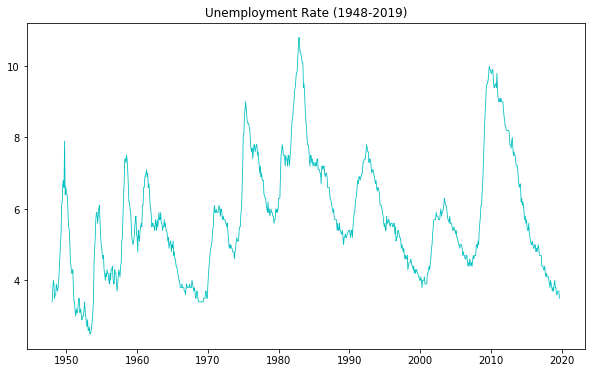

In [78]:
plt.figure(figsize=(10, 6))
plt.plot('conv', 'UNRATE', data=unemp_data, color='c', linewidth=0.8)
plt.title('Unemployment Rate (1948-2019)')
plt.show()

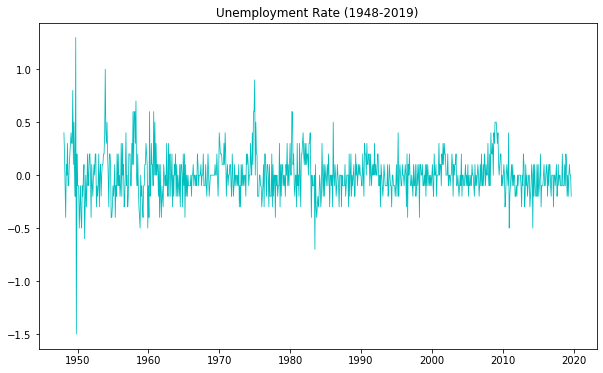

In [87]:
unemp_data['diff_1'] = unemp_data.UNRATE - unemp_data.UNRATE.shift()
plt.figure(figsize=(10, 6))
plt.plot('conv', 'diff_1', data=unemp_data, color='c', linewidth=0.8)
plt.title('Unemployment Rate (1948-2019)')
plt.show()

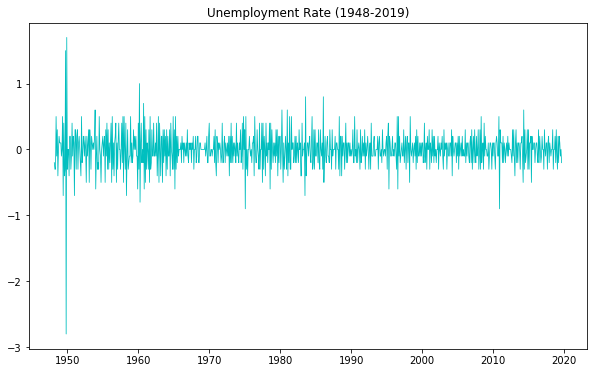

In [86]:
# let's try differencing one more order
unemp_data['diff_2'] = unemp_data.diff_1 - unemp_data.diff_1.shift()
plt.figure(figsize=(10, 6))
plt.plot('conv', 'diff_2', data=unemp_data, color='c', linewidth=0.8)
plt.title('Unemployment Rate (1948-2019)')
plt.show()

It seems pretty stationary now. 

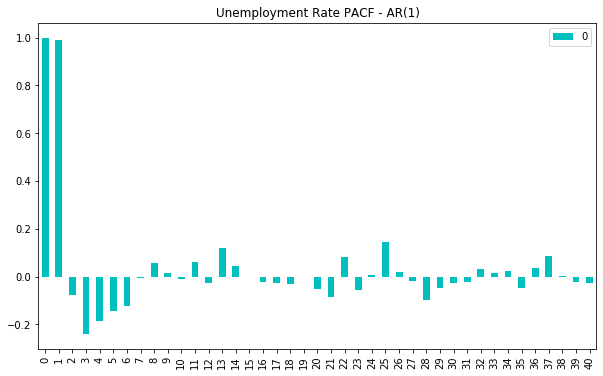

In [94]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(unemp_data.UNRATE))
x_acf.plot(kind='bar', figsize=(10, 6), color='c')
plt.title("Unemployment Rate PACF - AR(1)")
plt.show()

1 shows a strong autocorrelation. Let's see the moving average plot